In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [44]:
df = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [46]:
df = df.drop(columns=['Id'])

In [47]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [48]:
df.duplicated().sum()

3

In [49]:
duplicates = df[df.duplicated()]
print(duplicates)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
34             4.9           3.1            1.5           0.1     Iris-setosa
37             4.9           3.1            1.5           0.1     Iris-setosa
142            5.8           2.7            5.1           1.9  Iris-virginica


In [50]:
df = df.drop_duplicates()

In [51]:
df.duplicated().sum()

0

In [52]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
df['Species'].value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [54]:
le = LabelEncoder()
le.fit(df['Species'])
df['Species'] = le.transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
unique_species = np.unique(df['Species'])
print("Unique values in 'Species':", unique_species)

Unique values in 'Species': [0 1 2]


In [56]:
x = df.drop(['Species'], axis=1)
y = df[['Species']]

<Figure size 1000x800 with 0 Axes>

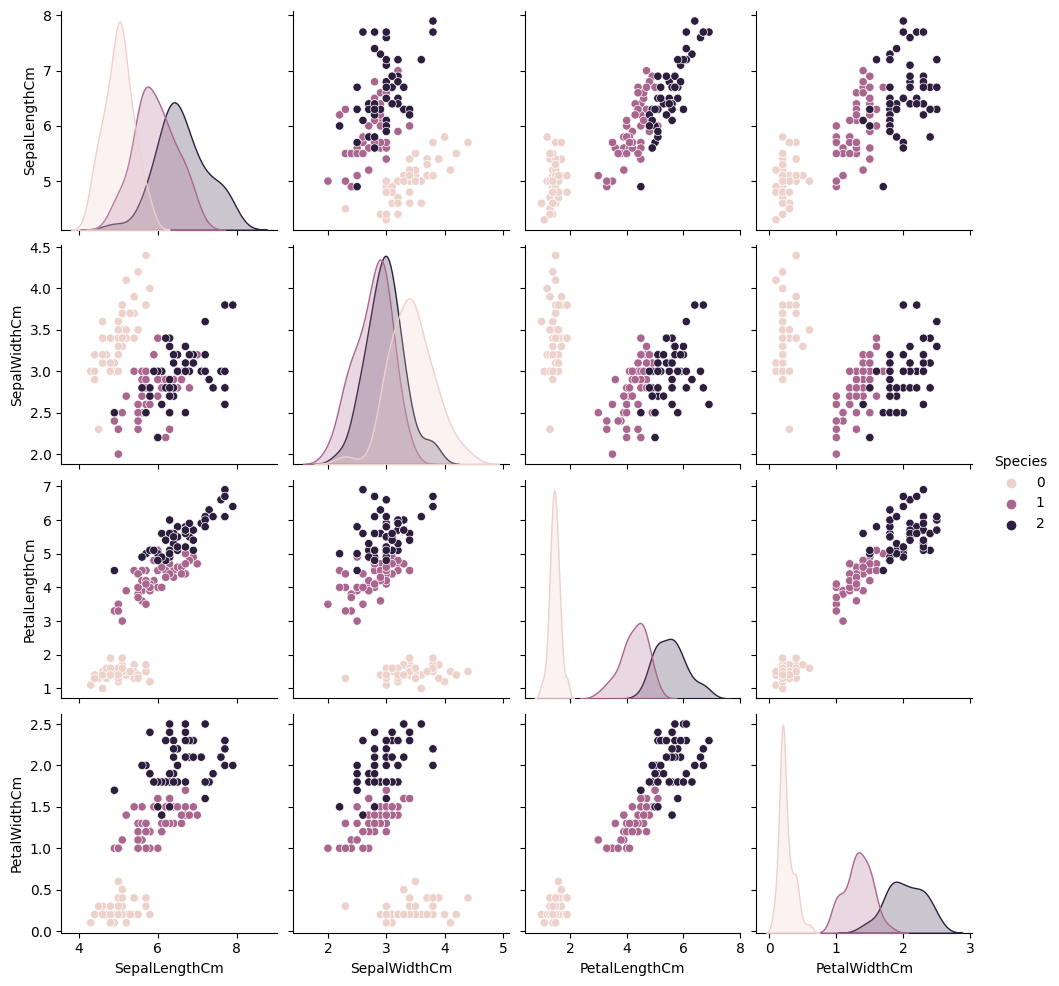

In [57]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='Species')
plt.show()

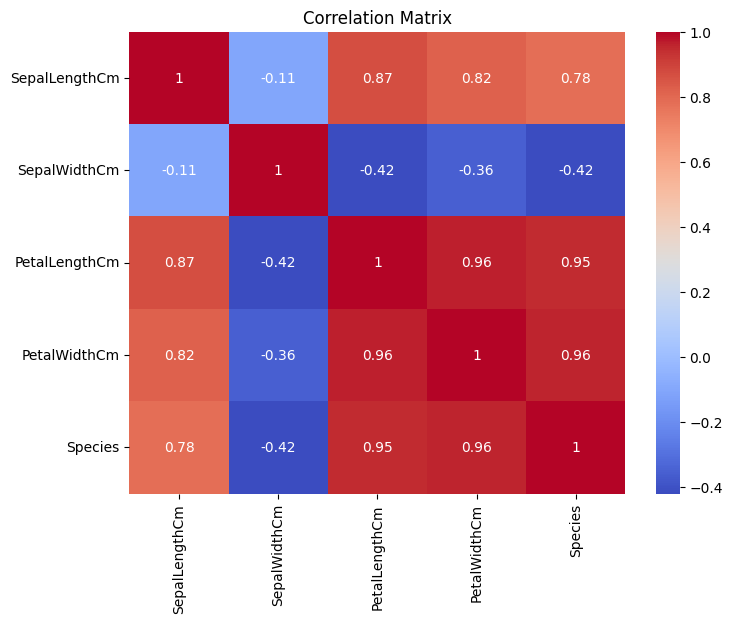

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

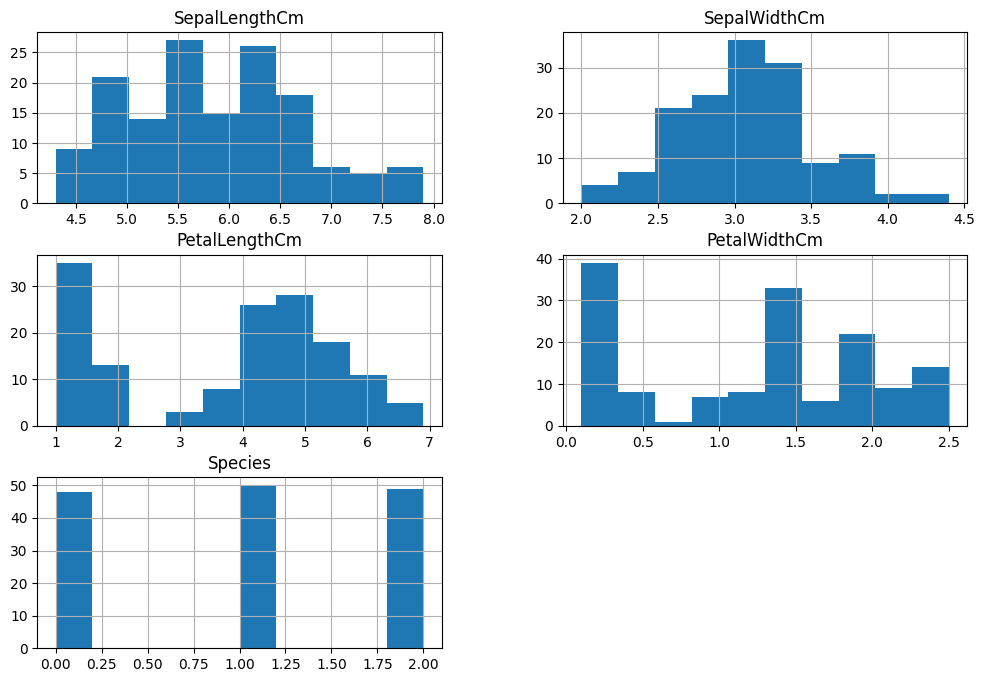

In [59]:
df.hist(figsize=(12, 8))
plt.show()

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [62]:
# Flatten y_train and y_test to 1-dimensional arrays
y_train_flat = y_train.values.ravel()
y_test_flat = y_test.values.ravel()

# Train the RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train_flat)
rf_predictions = rf_model.predict(x_test)

print("\nRandom Forest:")
print("Classification Report:\n", classification_report(y_test_flat, rf_predictions))
print("Accuracy:", f"{round(accuracy_score(y_test_flat, rf_predictions) * 100, 2)}%")


Random Forest:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Accuracy: 93.33%


In [63]:
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(x_train, y_train_flat)
knn_predictions = knn_model.predict(x_test)
print("K-Nearest Neighbors:")
print("Classification Report:\n", classification_report(y_test_flat, knn_predictions))
print("Accuracy:",f"{round(accuracy_score(y_test_flat, knn_predictions)*100, 2)}%")

K-Nearest Neighbors:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Accuracy: 93.33%


In [64]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train_flat)
lr_predictions = lr_model.predict(x_test)
print("Logistic Regression:")
print("Classification Report:\n", classification_report(y_test_flat, lr_predictions))
print("Accuracy:",f"{round(accuracy_score(y_test_flat, lr_predictions)*100, 2)}%")

Logistic Regression:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 96.67%
